# Data Visualisation Portfolio Project
## Life Expectancy and GDP

For this project, you will interpret data from the National Parks Service about endangered species in different parks.

You will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, you will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.

After you perform your analysis, you will share your findings about the National Park Service.

### Project Objectives

1. Complete a project to add to your portfolio
2. Use Jupyter Notebook to communicate findings
3. Run an analysis on a set of data
4. Become familiar with data analysis workflow

### Data

In [1]:
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
import pandas as pd
import seaborn as sns
import numpy as np

species_info = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

print('''There are two datasets in this project. The first details species info across national parks, with column headers in a. The second breaks down observations, as shown in b.
 a. {} - {} lines\n b. {} - {} lines\n'''.format(species_info.columns.values, len(species_info), observations.columns.values, len(observations)))
print('The conservation_status values are {}'.format(species_info.conservation_status.unique()))
#print(observations.head())
#print(species_info.head())


There are two datasets in this project. The first details species info across national parks, with column headers in a. The second breaks down observations, as shown in b.
 a. ['category' 'scientific_name' 'common_names' 'conservation_status'] - 5824 lines
 b. ['scientific_name' 'park_name' 'observations'] - 23296 lines

The conservation_status values are [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


### Explore and explain data

Let's look at the species information across all 4 national parks in this dataset. All parks have data regarding the 5,824 species detailed in the species_info __csv file__.
First up, the distribution of conservation status across all 4 parks (for all species that are *not* of least concern)


Text(0.5, 1.0, 'Number of species across the 4 national parks that are not of least concern')

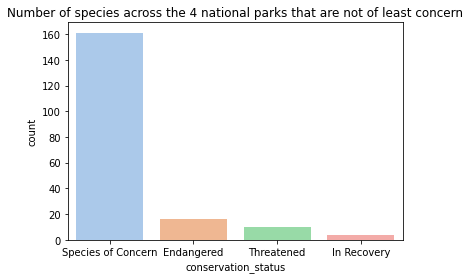

In [2]:
sns.countplot(data = species_info, x = 'conservation_status', palette = 'pastel')
plt.title('Number of species across the 4 national parks that are not of least concern')

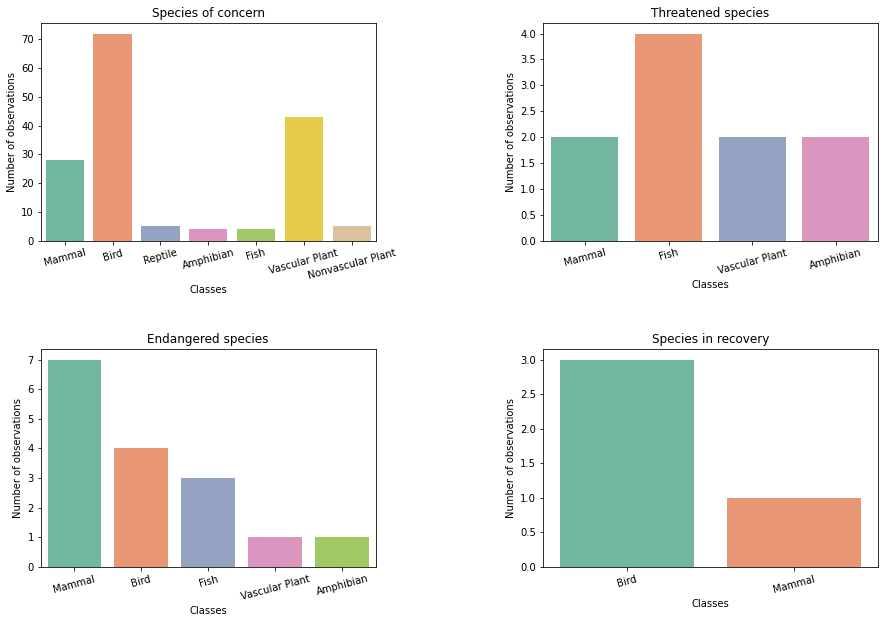

In [3]:
species_nan = species_info[species_info.conservation_status.isna()]
species_concern = species_info[species_info.conservation_status == 'Species of Concern']
species_threatened = species_info[species_info.conservation_status == 'Threatened']
species_endangered = species_info[species_info.conservation_status == 'Endangered']
species_recovery = species_info[species_info.conservation_status == 'In Recovery']

plt.figure(figsize=(15,10))
datasets = [species_concern, species_threatened, species_endangered, species_recovery]
title = ['Species of concern', 'Threatened species', 'Endangered species', 'Species in recovery']

for i in range(len(datasets)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(data = datasets[i], x = 'category', palette = 'Set2')
    ax.set(xlabel = 'Classes', ylabel = 'Number of observations', title = title[i])
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 15)
plt.subplots_adjust(wspace = .5, hspace = .5)

Text(0.5, 1.0, 'Breakdown of the classes for observations of species at risk')

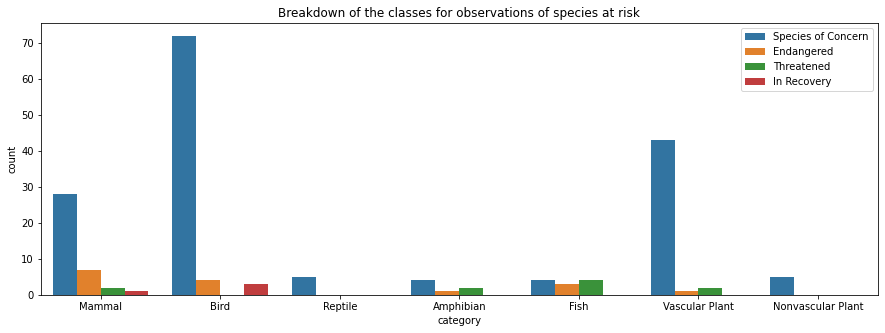

In [4]:
plt.figure(figsize=(15,5))
sns.countplot(data = species_info, x = 'category', hue = 'conservation_status')
plt.legend(loc = 'upper right')
plt.title('Breakdown of the classes for observations of species at risk')

Text(0.5, 1.0, 'Number of observations for each status, breaking it down by location')

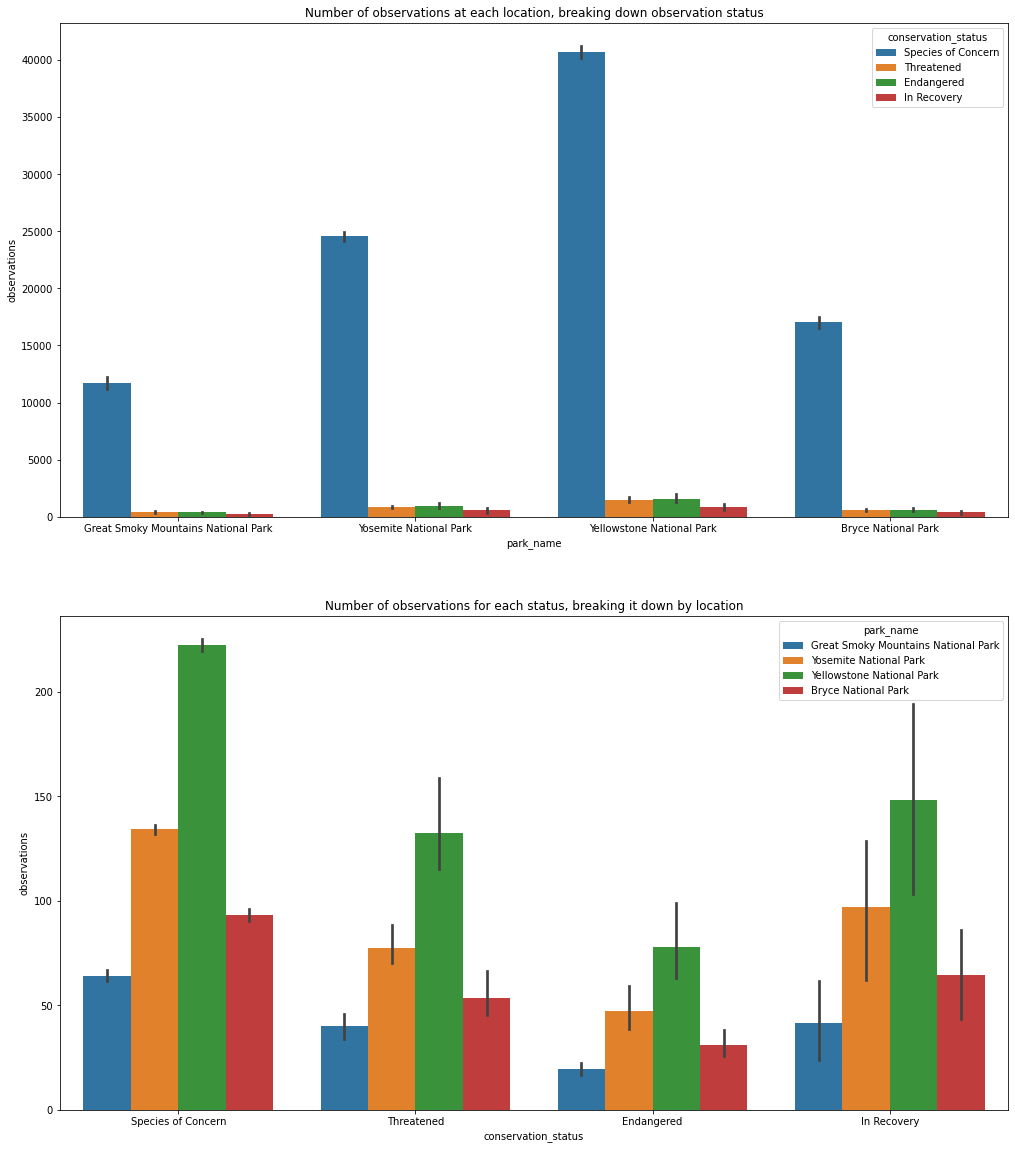

In [5]:
all_data = pd.merge(observations,species_info, on = 'scientific_name')

plt.figure(figsize=(17,20))
plt.subplot(2,1,1)
sns.barplot(data = all_data, x = 'park_name', y = 'observations', hue = 'conservation_status', estimator = np.sum)
plt.title('Number of observations at each location, breaking down observation status')
plt.subplot(2,1,2)
sns.barplot(data = all_data, x = 'conservation_status', y = 'observations', hue = 'park_name')
plt.title('Number of observations for each status, breaking it down by location')


Let's look at the species information across all 4 national parks in this dataset after having normalised numbers by park size. All parks have data regarding the 5,824 species detailed in the species_info __csv file__.


<AxesSubplot:xlabel='conservation_status', ylabel='park_proportion'>

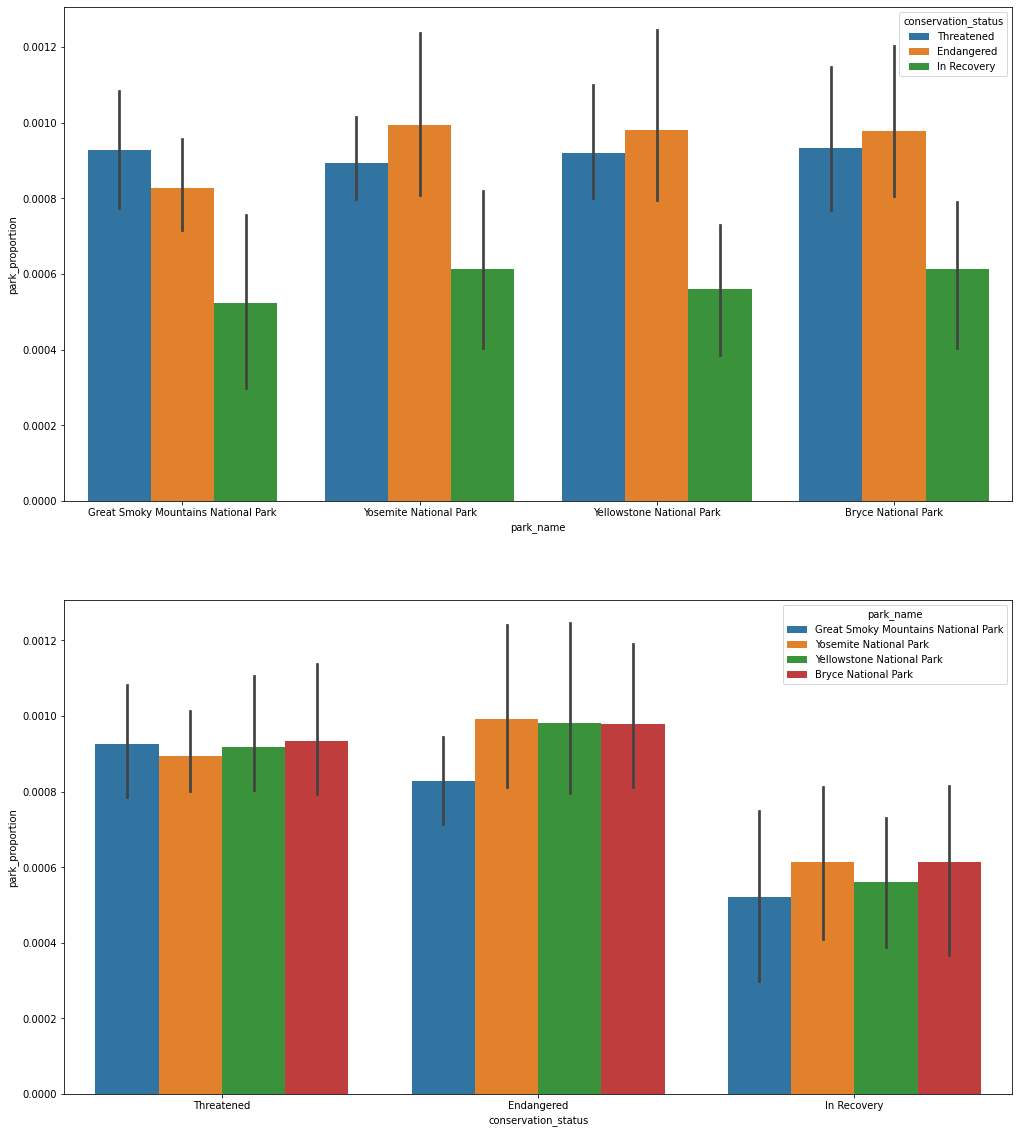

In [6]:
total_smoky_mountains = np.sum(all_data.observations[all_data.park_name == 'Great Smoky Mountains National Park'])
total_yosemite = np.sum(all_data.observations[all_data.park_name == 'Yosemite National Park'])
total_yellowstone = np.sum(all_data.observations[all_data.park_name == 'Yellowstone National Park'])
total_bryce = np.sum(all_data.observations[all_data.park_name == 'Bryce National Park'])

national_parks = ['Great Smoky Mountains National Park', 'Yosemite National Park', 'Yellowstone National Park', 'Bryce National Park']
totals = [total_smoky_mountains, total_yosemite, total_yellowstone, total_bryce]

all_data['park_proportion'] = all_data.apply(lambda x: x.observations / totals[0] if x.park_name == national_parks[0]
                                                          else (x.observations / totals[1] if x.park_name == national_parks[1]
                                                          else (x.observations / totals[2] if x.park_name == national_parks[2]
                                                          else (x.observations / totals[3]))), axis = 1)

all_data_except_concern = all_data[all_data.conservation_status != 'Species of Concern']
plt.figure(figsize=(17,20))
plt.subplot(2,1,1)
sns.barplot(data = all_data_except_concern, x = 'park_name', y = 'park_proportion', hue = 'conservation_status', estimator = np.sum)
plt.subplot(2,1,2)
sns.barplot(data = all_data_except_concern, x = 'conservation_status', y = 'park_proportion', hue = 'park_name', estimator = np.sum)


Now that we have a better understanding of the dataset and the information it contains, let's perform hypothesis testing for the following questions:

1. Are certain types of species more likely to be endangered?
2. Are the differences between species and their conservation status significant?
3. Which species were spotted the most at each park?


In [7]:
all_data['Endangered'] = all_data.conservation_status.apply(lambda x: 'Endangered' if x == 'Endangered' else 'Not Endangered')
xtab_endangered = pd.crosstab(all_data.Endangered, all_data.category)
print(xtab_endangered)
chi2, pval, dof, expected = chi2_contingency(xtab_endangered)
print('\n')
print(expected)
print('\n')
print('The p value for this chi square test is: {}'.format(pval))


category        Amphibian  Bird  Fish  Mammal  Nonvascular Plant  Reptile  \
Endangered                                                                  
Endangered              4    16    12      44                  0        0   
Not Endangered        324  2348   512    1156               1332      324   

category        Vascular Plant  
Endangered                      
Endangered                   4  
Not Endangered           19556  


[[1.02372035e+00 7.37827715e+00 1.63545568e+00 3.74531835e+00
  4.15730337e+00 1.01123596e+00 6.10486891e+01]
 [3.26976280e+02 2.35662172e+03 5.22364544e+02 1.19625468e+03
  1.32784270e+03 3.22988764e+02 1.94989513e+04]]


The p value for this chi square test is: 1.7893820035769295e-121


If we breakdown our data to look at classes and species whose conservation_status is 'Endangered' against all others, p < .05 and we can therefore conclude that some classes are more likely to be endangered than others.

In [10]:
xtab = pd.crosstab(all_data.conservation_status, all_data.category)
print(xtab)
chi2, pval, dof, expected = chi2_contingency(xtab)
print('\n')
print(expected)
print('\n')
print('The p value for this chi square test is: {}'.format(pval))

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                   4    16    12      44                  0   
In Recovery                  0    12     0      12                  0   
Species of Concern          16   320    16     168                 20   
Threatened                   8     0    20       8                  0   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered                 0               4  
In Recovery                0               0  
Species of Concern        20             172  
Threatened                 0               8  


[[  2.54545455  31.63636364   4.36363636  21.09090909   1.81818182
    1.81818182  16.72727273]
 [  0.76363636   9.49090909   1.30909091   6.32727273   0.54545455
    0.54545455   5.01818182]
 [ 23.29090909 289.47272727  39.92727273 192.98181818  16.63636364
   16.63636364 153

Therefore the differences between classes and species' conservation status is significant (ie the null hypothesis that they all have a similar distribution is refuted).

In [9]:
max_values = all_data.groupby('park_name')['observations'].max()
print(max_values)
print('\n\n')
print('''Most spotted species at Bryce National Park: {}
Most spotted species at Great Smoky Monutains National Park: {}
Most spotted species at Yellowstone National Park: {}
Most spotted species at Yosemite National Park: {}'''.format(all_data.scientific_name[(all_data.park_name == 'Bryce National Park') & (all_data.observations == 176)].values, all_data.scientific_name[(all_data.park_name == 'Great Smoky Mountains National Park') & (all_data.observations == 147)].values, all_data.scientific_name[(all_data.park_name == 'Yellowstone National Park') & (all_data.observations == 321)].values, all_data.scientific_name[(all_data.park_name == 'Yosemite National Park') & (all_data.observations == 223)].values))

park_name
Bryce National Park                    176
Great Smoky Mountains National Park    147
Yellowstone National Park              321
Yosemite National Park                 223
Name: observations, dtype: int64



Most spotted species at Bryce National Park: ['Valerianella radiata']
Most spotted species at Great Smoky Monutains National Park: ['Sonchus asper ssp. asper']
Most spotted species at Yellowstone National Park: ['Lycopodium tristachyum']
Most spotted species at Yosemite National Park: ['Ivesia shockleyi var. shockleyi']
